In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (10000, 8)


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
# Check data types and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB

Missing values per column:
 customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [5]:
# Quick statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,4.974577e+06,2.293890e+06,1.000324e+06,2.977661e+06,4.989502e+06,6.967210e+06,8.999789e+06
credit_lines_outstanding,10000.0,1.461200e+00,1.743846e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
loan_amt_outstanding,10000.0,4.159677e+03,1.421399e+03,4.678397e+01,3.154235e+03,4.052377e+03,5.052898e+03,1.075068e+04
total_debt_outstanding,10000.0,8.718917e+03,6.627165e+03,3.165273e+01,4.199836e+03,6.732407e+03,1.127226e+04,4.368878e+04
income,10000.0,7.003990e+04,2.007221e+04,1.000000e+03,5.653987e+04,7.008583e+04,8.342917e+04,1.484122e+05
years_employed,10000.0,4.552800e+00,1.566862e+00,0.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01
fico_score,10000.0,6.375577e+02,6.065791e+01,4.080000e+02,5.970000e+02,6.380000e+02,6.790000e+02,8.500000e+02
default,10000.0,1.851000e-01,3.883981e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


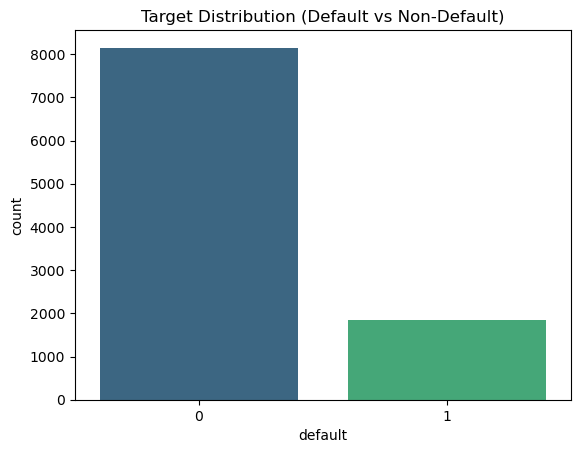

In [6]:
# Check target distribution (Default or Not)
sns.countplot(x='default', data=df, palette='viridis')
plt.title("Target Distribution (Default vs Non-Default)")
plt.show()

In [7]:
# Encode categorical columns if any
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print("Encoding categorical columns:", list(cat_cols))
    df = pd.get_dummies(df, drop_first=True)

In [8]:
x = df.drop('default', axis=1)
y = df['default']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
#  Model Training

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(x_train, y_train)

# Predictions
y_pred_log = log_reg.predict(x_test_scaled)
y_pred_rf = rf_clf.predict(x_test)

# Probabilities (for PD)
pd_log = log_reg.predict_proba(x_test_scaled)[:,1]
pd_rf = rf_clf.predict_proba(x_test)[:,1]



Model: Logistic Regression
Accuracy: 0.9955
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



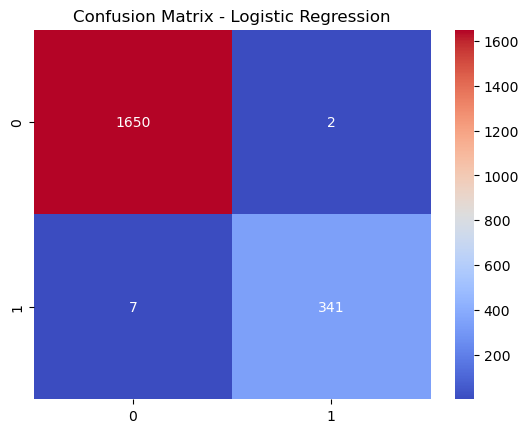


Model: Random Forest
Accuracy: 0.995
ROC-AUC: 0.9997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.99       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



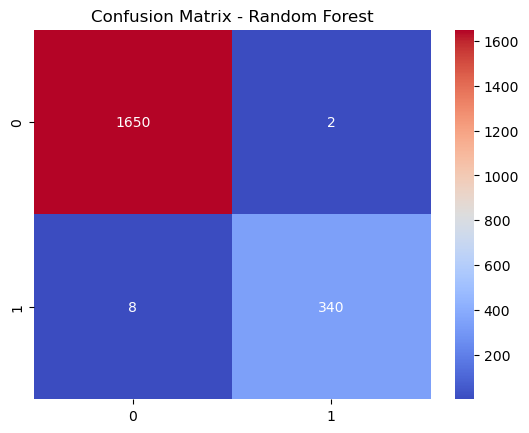

In [11]:
# Model Evaluation

def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\nModel: {name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_log, pd_log)
evaluate_model("Random Forest", y_test, y_pred_rf, pd_rf)


In [12]:
#  Expected Loss Function

def expected_loss(model, borrower_details, recovery_rate=0.1, scaler=None):
    """
    Calculate expected loss for a given borrower.
    model: trained model
    borrower_details: dict or DataFrame with borrower info
    recovery_rate: float (default 0.1)
    scaler: optional (for scaled models like Logistic Regression)
    """
    borrower_df = pd.DataFrame([borrower_details])
    
    # One-hot encode if needed (same columns as training)
    borrower_df = pd.get_dummies(borrower_df)
    for col in x.columns:
        if col not in borrower_df.columns:
            borrower_df[col] = 0
    borrower_df = borrower_df[x.columns]
    
    # Scale if model is logistic regression
    if scaler:
        borrower_df = scaler.transform(borrower_df)
    
    pd_value = model.predict_proba(borrower_df)[:,1][0]
    loan_amt = borrower_details.get('LoanAmount', 0)
    expected_loss_value = pd_value * (1 - recovery_rate) * loan_amt
    
    return round(expected_loss_value, 2), round(pd_value, 3)




In [13]:
#  Test Expected Loss Function

sample_borrower = {
    'credit_lines_outstanding': 0,
    'loan_amt_outstanding': 5221.545193,
    'total_debt_outstanding': 3915.471226,
    'income': 78039.38546,
    'years_employed': 5,
    'fico_score': 605
}

loss, prob = expected_loss(log_reg, sample_borrower, scaler=scaler)
print(f"Predicted Probability of Default (PD): {prob}")
print(f"Expected Loss (EL): ${loss}")


Predicted Probability of Default (PD): 0.0
Expected Loss (EL): $0.0
